# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками




### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5



Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\nabla_w Q(w) = 2X^T(Xw-y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

plt.rcParams['figure.figsize'] = 12, 7

In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

сначала разделим выборку на обучающую, валидационную и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=10)
# использую test на данном этапе как объединение тестовой и валидационной,
# чтобы применять трансформ и изменения датасета 2 раза вместо 3

теперь построим распределение только по обучающей и будем ее чистить

Text(0.5, 1.0, 'car prices distribution')

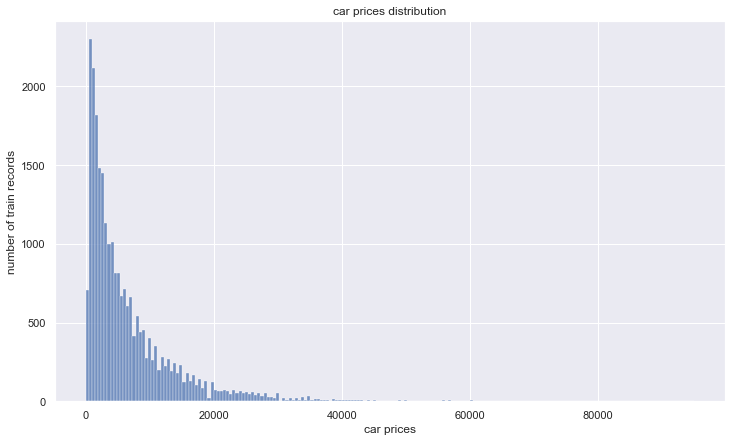

In [ ]:
ax = sns.histplot(train.price.sample(25000))
ax.set_xlabel('car prices')
ax.set_ylabel('number of train records')
ax.set_title('car prices distribution')

как будто бы стоит заменить на логарифм, потому что тогда у нас распределение будет более похоже нормальное. а то так оно довольно сильно сдвинуто влево, распредление несимметричное, графики не очень информативные будут

ну и к тому же цитата с семинара: "если разбирать линейную регрессию c MSE ошибкой с вероятностной точки зрения, то можно получить, что шум должен быть распределён нормально, поэтому лучше, когда целевая переменная распределена также нормально"

<ipython-input-311-7a4e7d8e12cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_price'] = np.log1p(train.price)


Text(0.5, 1.0, 'logarithm of car prices distribution')

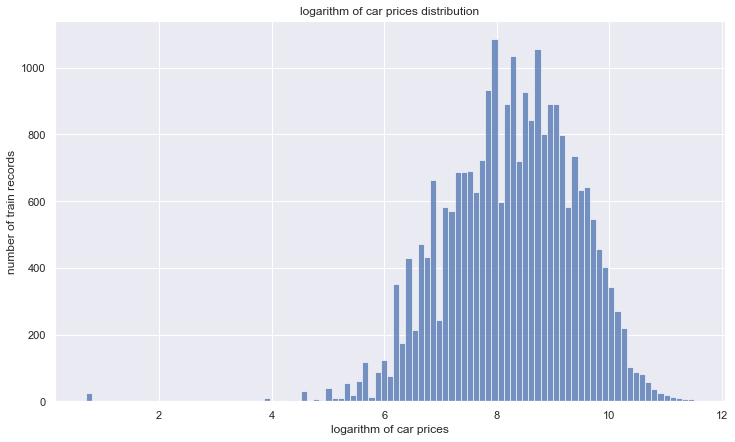

In [ ]:
train['log_price'] = np.log1p(train.price)
ax = sns.histplot(train.log_price.sample(25000))
ax.set_xlabel('logarithm of car prices')
ax.set_ylabel('number of train records')
ax.set_title('logarithm of car prices distribution')

ну и добавим логарифм во все остальные данные: в валидационную и тестовую. будем в итоге предсказывать логарифм

In [ ]:
test['log_price'] = np.log1p(test.price)

<ipython-input-312-b9809df28f9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['log_price'] = np.log1p(test.price)


посмотрим теперь в прицнипе на данные, минимум, максимум и все такое

In [ ]:
train.log_price.describe()

count    192952.000000
mean          8.264138
std           1.152844
min           0.693147
25%           7.467942
50%           8.318986
75%           9.103979
max          11.512925
Name: log_price, dtype: float64

заметим, что как-то странно, когда у нас цена на машину меньше, чем $e^4$, – это где-то 50 баксов. выглядит так, будто это просто установили минимальную стоимость, чтобы не писать реальную – нам такие данные не нужны, они непоказательные, лучше их удалить

In [ ]:
train[train.log_price < 4]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
147425,renault,twingo,kleinwagen,manuell,benzin,nein,58,150000,309,1,0.693147
56048,volvo,andere,limousine,manuell,benzin,nein,140,150000,220,1,0.693147
52447,mercedes_benz,e_klasse,limousine,manuell,benzin,nein,136,150000,327,1,0.693147
9076,volvo,v40,kombi,manuell,benzin,ja,150,150000,237,50,3.931826
145755,bmw,7er,limousine,automatik,diesel,nein,245,150000,183,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
18867,opel,astra,cabrio,manuell,benzin,ja,140,80000,106,1,0.693147
98072,audi,a6,limousine,manuell,diesel,nein,170,150000,220,1,0.693147
89798,ford,mondeo,limousine,automatik,benzin,nein,146,150000,182,1,0.693147
41126,volkswagen,golf,kombi,manuell,diesel,nein,105,5000,77,50,3.931826


In [ ]:
train = train[train.log_price > 4]

теперь поглядим на обучающей выборке зависимость целевой переменной от разных признаков и их распределения

In [ ]:
# но сначала на всякий случай проверим, что в нашем исходном датасете нет никаких пропусков
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

в данных в столбце `notRepairedDamage` да и нет написаны на немецком, сделаем из этого yes и no для удобства

In [ ]:
train.loc[(train.notRepairedDamage == 'ja'), 'notRepairedDamage'] = 'yes'
train.loc[(train.notRepairedDamage == 'nein'), 'notRepairedDamage'] = 'no'

test.loc[(test.notRepairedDamage == 'ja'), 'notRepairedDamage'] = 'yes'
test.loc[(test.notRepairedDamage == 'nein'), 'notRepairedDamage'] = 'no'

/Users/neudachina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# убираю на данный момент категорию model для рассмотрения, потому что там неадекватно много вариантов
# и графики все равно не очень разумные получаются, нет смысла их смотреть
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

поглядим на среднее значение таргета для каждого варианта в категориальных признаках

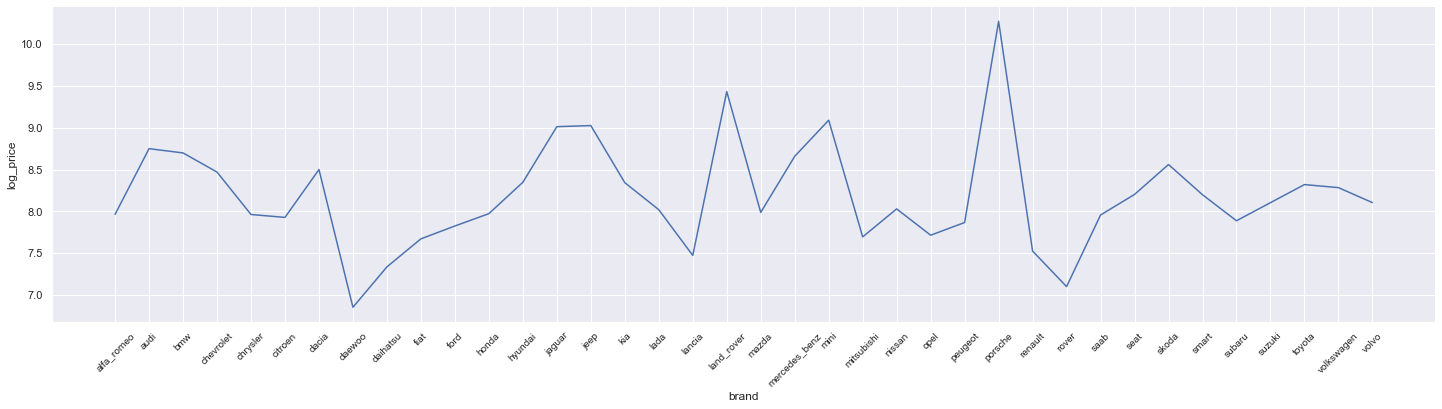

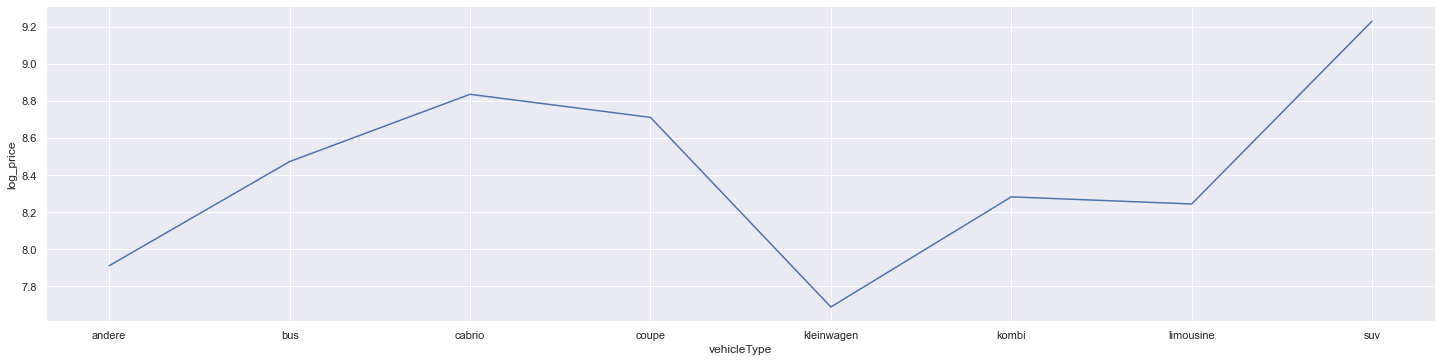

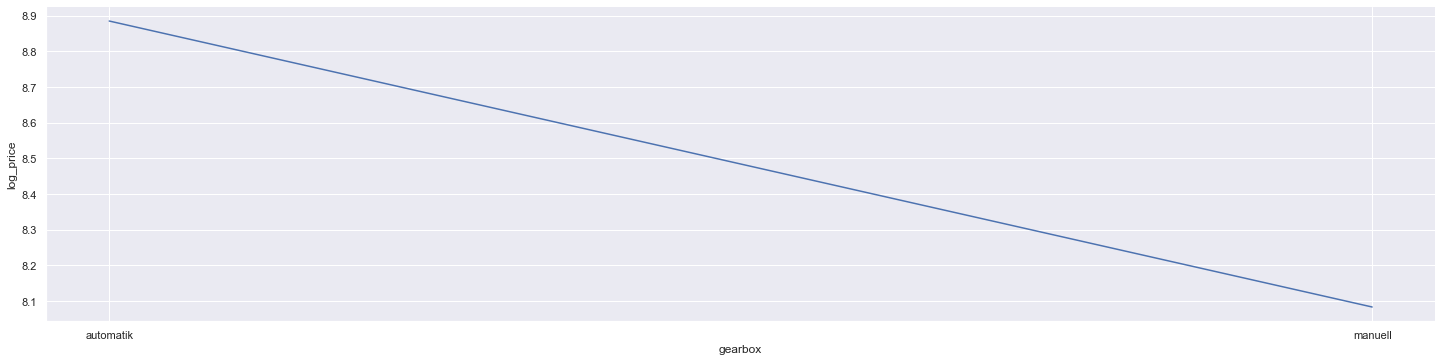

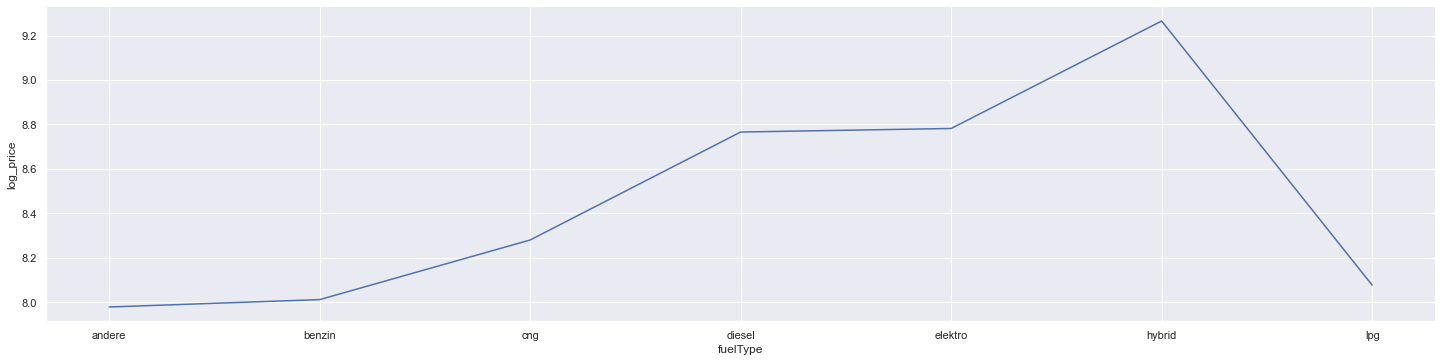

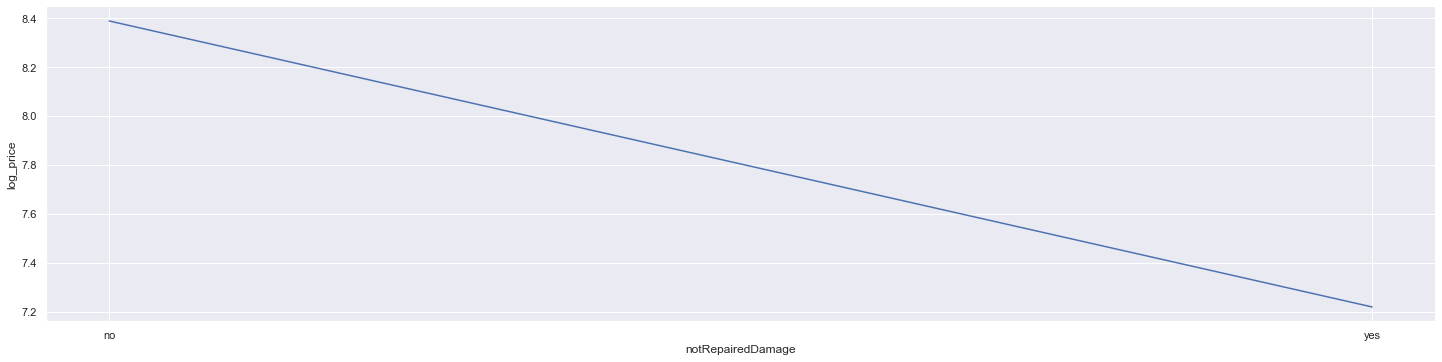

In [ ]:
for category in categorical:
    sns.relplot(data=train.groupby(by=[category])['log_price'].mean(), kind='line', height=5, aspect=4)
    if category == 'brand':
        plt.xticks(rotation=45, fontsize=10)

    plt.subplots_adjust(hspace=0.4)
    ax.xaxis.set_label_coords(0.5, 1.1)

и для числовых аналогично: посмотрим на зависимость среднего таргета от значения

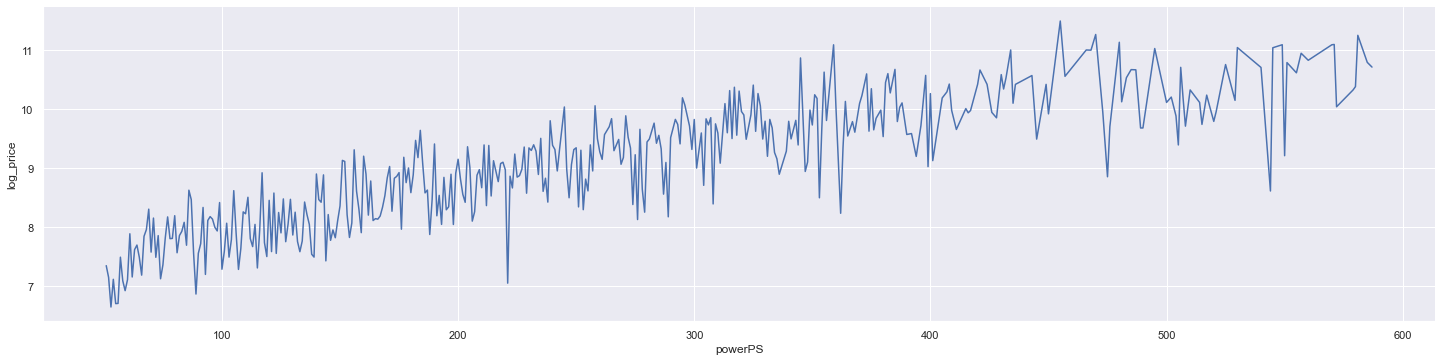

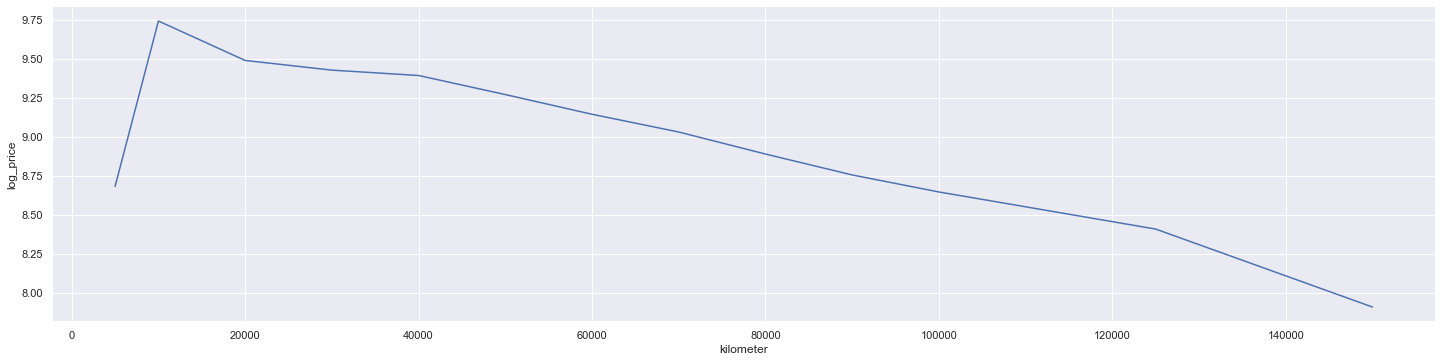

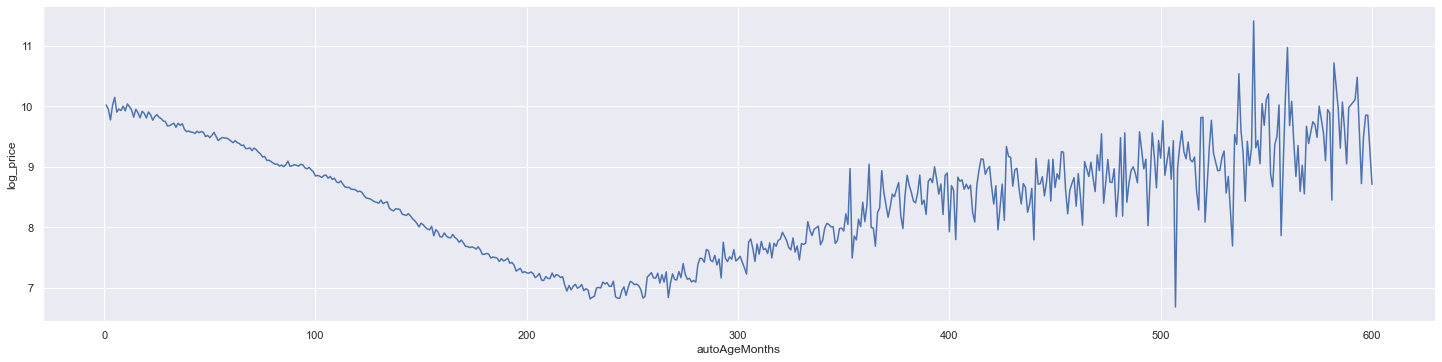

In [ ]:
for feature in numeric:
    sns.relplot(data=train.groupby(by=[feature])['log_price'].mean(), kind='line', height=5, aspect=4)

из забавного заметим, что после какого-то момента старость машины только увеличивает ее стоиость, видимо, она становится ретро))

теперь для числовых признаков посмотрим их распределение

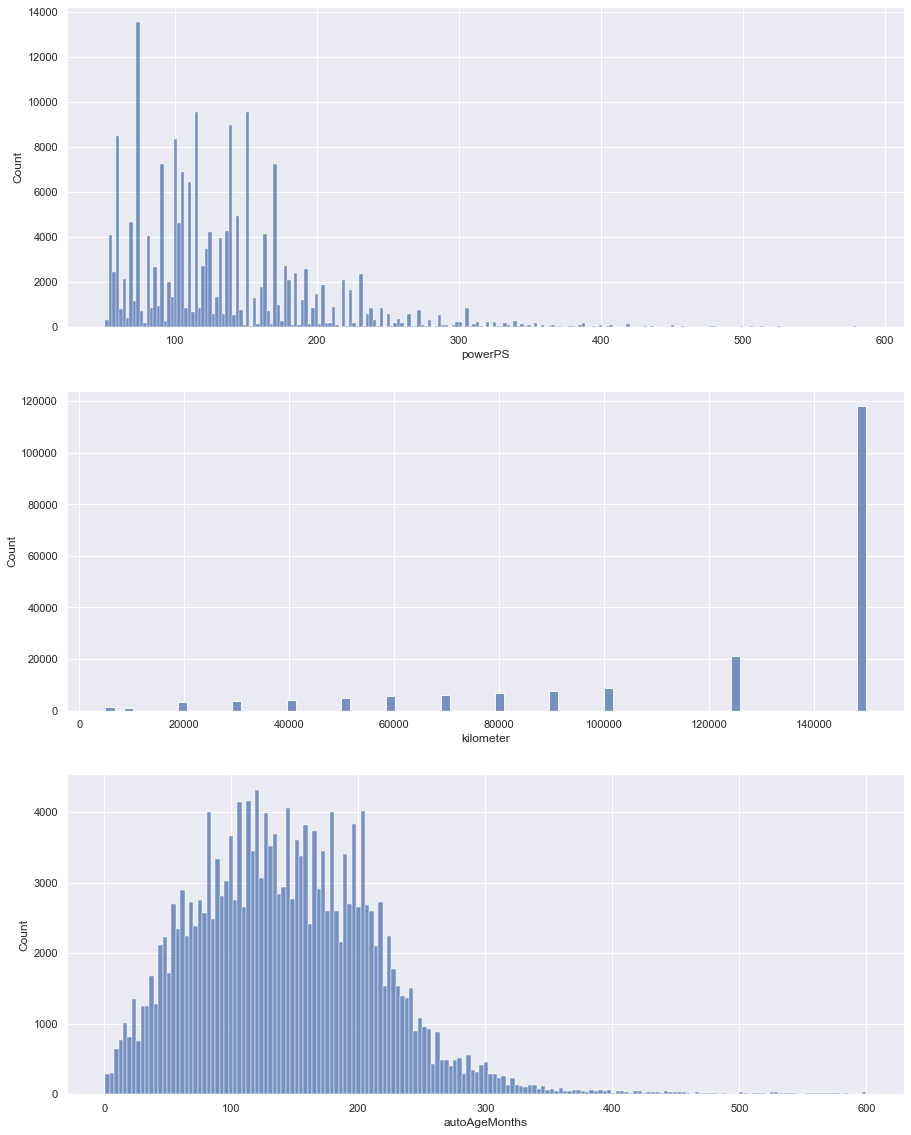

In [ ]:
fig = plt.figure(figsize = (15, 20))

i = 1
for feature in numeric:
    ax = fig.add_subplot(len(numeric), 1, i)
    sns.histplot(x=train[feature], ax=ax)
    i += 1

можно подумать, что стоит выкинуть их обучающей выборки те случаи, когда машина слишком старая > 400 месяцев (около 33 лет) и когда у нее очень много лошадиных сил > 350. но, посмотрев на зависимость таргета от этих значений, заметим, что там адекватный возрастающий тренд, так что, кажется, это не будет иметь смысла

теперь для всех категориальных признаков посмотрим сколько у нас вообще записей в датасете таких вариантов

In [ ]:
fig = plt.figure(figsize = (20, 30))

i = 1
for category in categorical:
    ax = fig.add_subplot(len(categorical), 1, i)

    sns.countplot(x=train[category], ax=ax)
    if category == 'brand':
        plt.xticks(rotation=45, fontsize=10)

    plt.subplots_adjust(hspace=0.4)
    ax.xaxis.set_label_coords(0.5, 1.1)
    i += 1

и вспомним, что я в самом начале решила не рассматривать категорию "модель машины", потому что там слишком много вариантов значений. попробую соединить редкие варианты категории в один и построить графики, аналогичные графикам выше

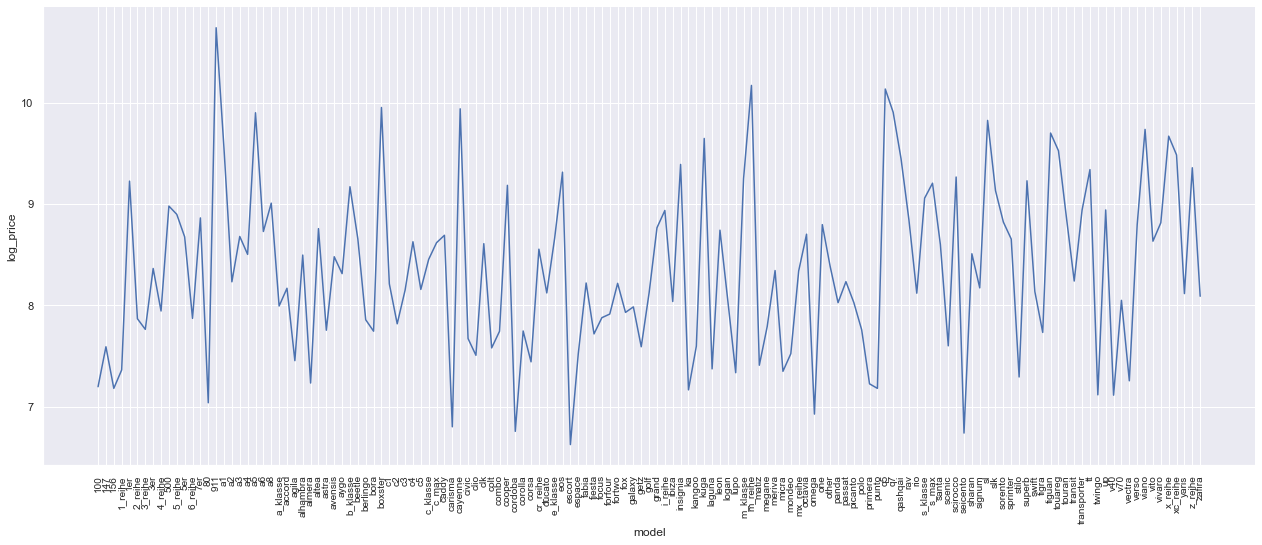

In [ ]:
def remove_rare(dataset, category):
    values = dataset[category].value_counts()
    rare = values.index[values/dataset.shape[0] < 0.001].to_list()
    for value in rare:
        dataset.loc[(dataset[category] == value), category] = 'other'
    # andere по-немецки -- другой, так что объединяю эти категории
    dataset.loc[dataset[category] == 'andere', category] = 'other'
    return dataset

train = remove_rare(train.copy(), 'model')
sns.relplot(data=train.groupby(by=['model'])['log_price'].mean(), kind='line', height=7, aspect=2.5)
plt.xticks(rotation=90, fontsize=10);

Text(0.5, 1.0, 'counts of car models without rare ones')

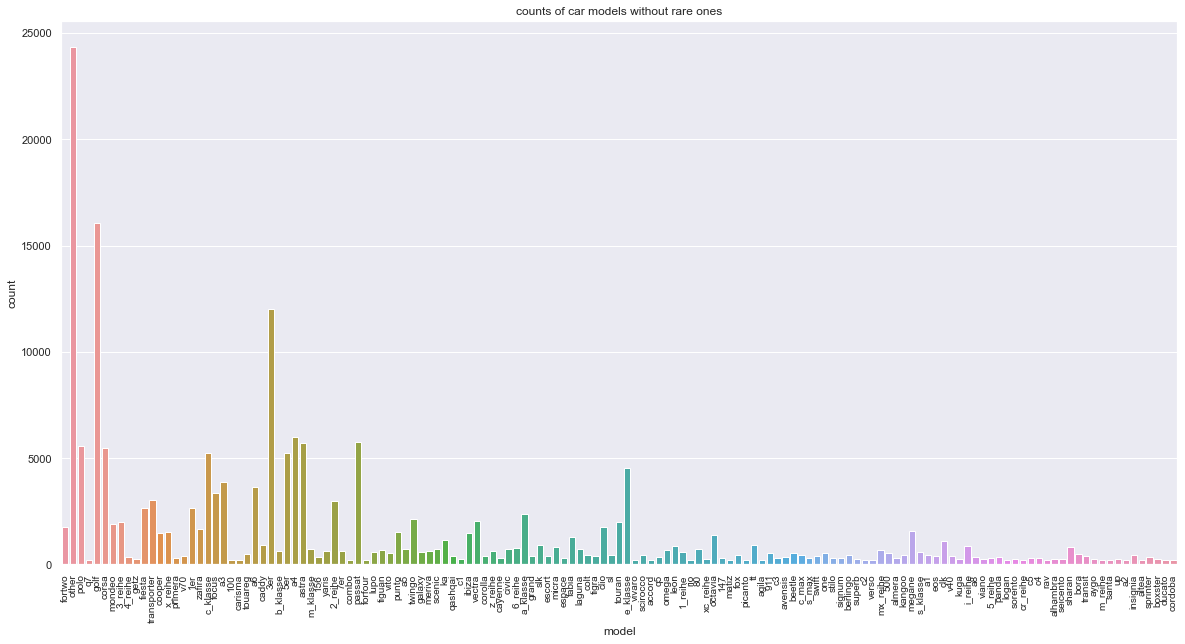

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x=train.model)
plt.xticks(rotation=90, fontsize=10);
plt.title('counts of car models without rare ones')

так же удалю редкие категории в брендах машин, потому что там их тоже много, если мы их все будем кодировать, у нас жестко разрастутся признаки

In [ ]:
train = remove_rare(train.copy(), 'brand')

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

train['bias'] = 1
test['bias'] = 1
other += ['bias']

x_train = train[categorical + numeric + other]
y_train = train['log_price']
y_train = y_train.values

x_test = test[categorical + numeric + other]
y_test = test['log_price']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)

<ipython-input-325-8bd77b2e8968>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['bias'] = 1


In [ ]:
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
from numpy import inf
from sklearn.utils import resample


descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 0
    }
}

iterations = dict()
best_lambdas = dict()
train_losses = dict()
test_losses = dict()


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name

    lambdas = np.logspace(-2, 2, 20)
    min_loss = 1000000000
    best_lambda = 0
    train_loss = 0
    test_loss = 0

    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(x_train, y_train)
        loss = regression.calc_loss(x_validation, y_validation)
        if loss < min_loss:
            min_loss = loss
            best_lambdas[descent_name] = lambda_
            train_losses[descent_name] = regression.calc_loss(x_train, y_train)
            test_losses[descent_name] = regression.calc_loss(x_test, y_test)
            iterations[descent_name] = regression.loss_history

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('--------------------', descent_name, '--------------------')
    print(f"best alpha: {best_lambdas[descent_name]}")
    print(f"train loss: {train_losses[descent_name]}")
    print(f"test loss: {test_losses[descent_name]}")
    print(f"number of iterations: {len(iterations[descent_name]) - 1}")

/Users/neudachina/Desktop/ML/3-gd/descents.py:80: RuntimeWarning: overflow encountered in matmul
  return (matrix.T @ matrix) / l
/Users/neudachina/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/neudachina/Desktop/ML/3-gd/linear_regression.py:32: RuntimeWarning: overflow encountered in square
  norm = (difference ** 2).sum()
/Users/neudachina/Desktop/ML/3-gd/descents.py:101: RuntimeWarning: invalid value encountered in add
  self.w += difference
/Users/neudachina/Desktop/ML/3-gd/descents.py:126: RuntimeWarning: overflow encountered in multiply
  return 2 * (x[indexes].T @ matrix) / self.batch_size
/Users/neudachina/Desktop/ML/3-gd/descents.py:144: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + self.lr() * gradient


-------------------- full --------------------
best alpha: 1.2742749857031335
train loss: 0.34449445041130694
test loss: 0.43883784563939754
number of iterations: 51
-------------------- stochastic --------------------
best alpha: 0.4832930238571752
train loss: 0.3723178622212747
test loss: 0.4786666842439982
number of iterations: 196
-------------------- momentum --------------------
best alpha: 0.7847599703514611
train loss: 0.28694965137498274
test loss: 0.39032691401199027
number of iterations: 111
-------------------- adam --------------------
best alpha: 1.2742749857031335
train loss: 0.27400389437787
test loss: 0.5151506546709551
number of iterations: 121


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

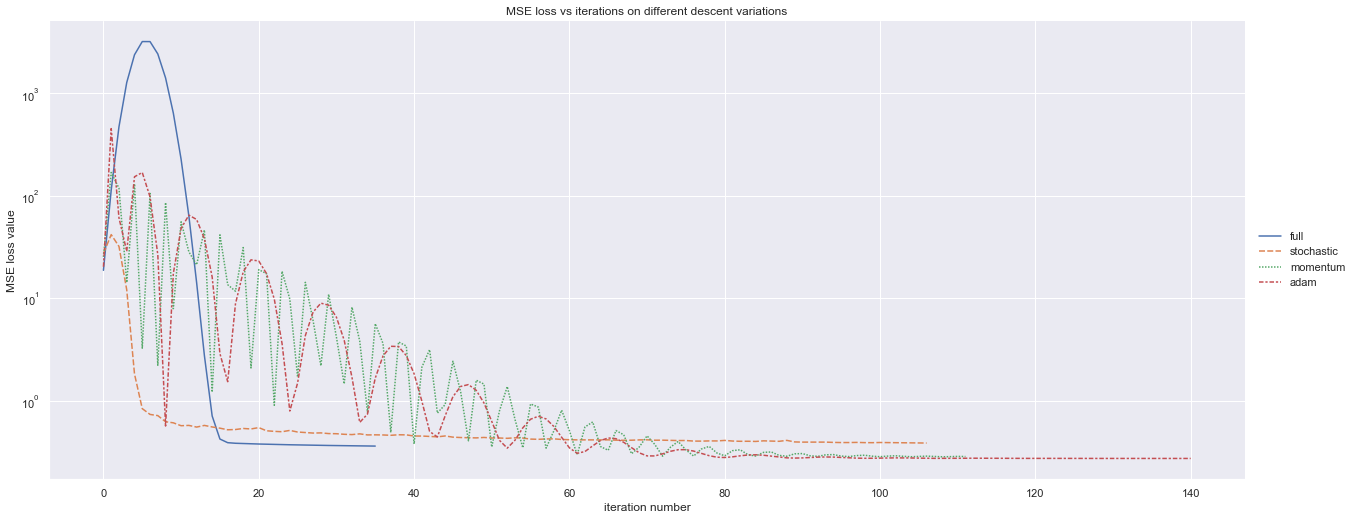

In [ ]:
from matplotlib.pyplot import xlabel, ylabel


ax = sns.relplot(data=iterations, kind='line', height=7, aspect=2.5)
ax.set(yscale="log", xlabel='iteration number', ylabel='MSE loss value', title='MSE loss vs iterations on different descent variations')

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

def average(values: list) -> float:
    sum = 0
    for value in values:
        sum += value
    return sum / len(values)


batch_sizes = np.arange(5, 500, 10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': best_lambdas['stochastic'],
        'batch_size': 0
    }
}

batches_times = dict()
batches_iterations = dict()

for batch in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch

    regression = LinearRegression(
        descent_config=descent_config
    )

    local_times = list()
    local_iterations = list()

    for k in range(10):
        begin = time.monotonic_ns()
        regression.fit(x_train, y_train)
        end = time.monotonic_ns()

        local_times.append(end - begin)
        local_iterations.append(len(regression.loss_history) - 1)

    batches_times[batch] = average(local_times)
    batches_iterations[batch] = average(local_iterations)

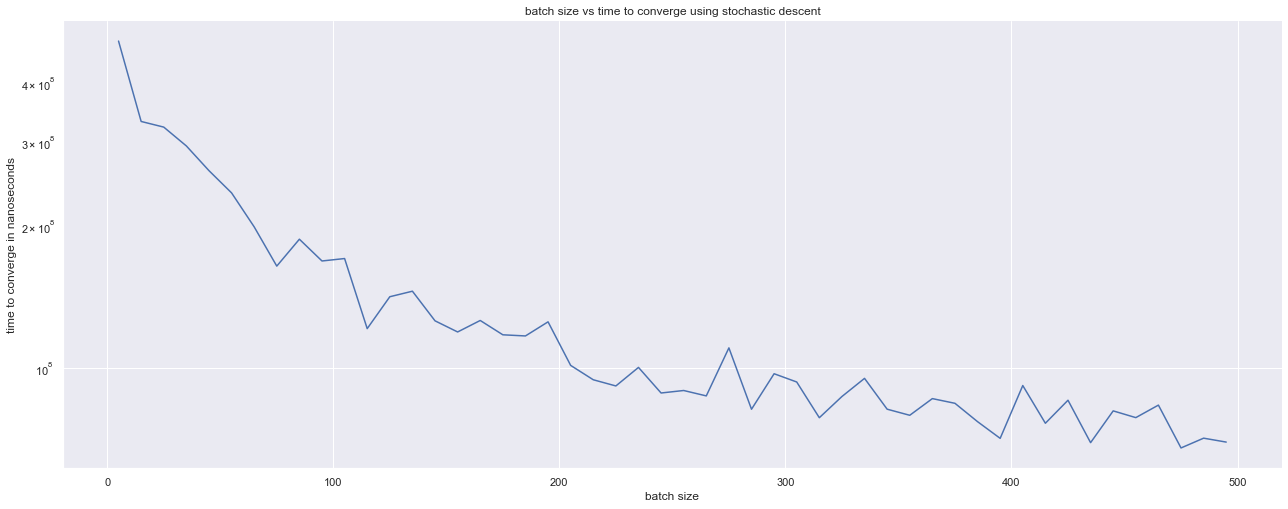

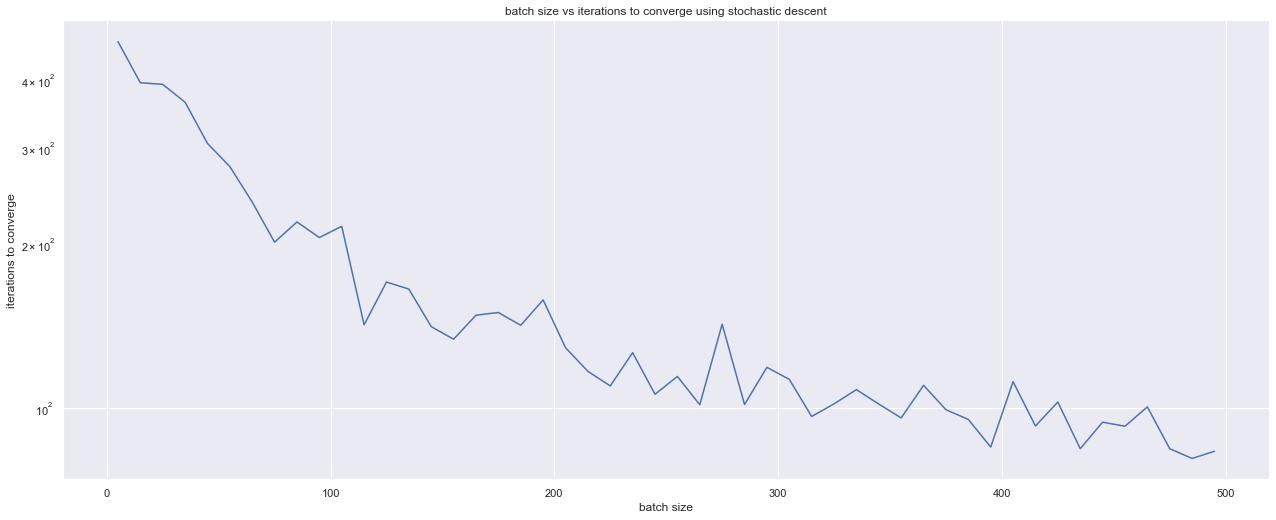

In [ ]:
ax = sns.relplot(data=batches_times, kind='line', height=7, aspect=2.5)
ax.set(yscale="log", xlabel='batch size', ylabel='time to converge in nanoseconds', title='batch size vs time to converge using stochastic descent')

ax = sns.relplot(data=batches_iterations, kind='line', height=7, aspect=2.5)
ax.set(yscale="log", xlabel='batch size', ylabel='iterations to converge', title='batch size vs iterations to converge using stochastic descent')

заметим, что на обоих графиках явно виден убывающий тренд, то есть с увеличением размера батча, в среднем уменьшается и количество итераций, необходимых для достижения минимума, и общего времени работы алгоритма

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73752855/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
from numpy import inf
from sklearn.utils import resample


descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 0,
        'mu': 0
    }
}

reg_iterations = dict()
reg_best_lambdas = dict()
reg_best_mu = dict()
reg_train_losses = dict()
reg_test_losses = dict()


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name

    lambdas = np.logspace(-2, 2, 10)
    mus = np.logspace(-2, 2, 10)
    min_loss = 1000000000
    best_lambda = 0
    best_mu = 0
    train_loss = 0
    test_loss = 0

    for lambda_ in lambdas:
        for mu in mus:
            descent_config['kwargs']['lambda_'] = lambda_
            descent_config['kwargs']['mu'] = mu

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(x_train, y_train)
            loss = regression.calc_loss(x_validation, y_validation)
            if loss < min_loss:
                min_loss = loss
                reg_best_lambdas[descent_name] = lambda_
                reg_best_mu[descent_name] = mu
                reg_train_losses[descent_name] = regression.calc_loss(x_train, y_train)
                reg_test_losses[descent_name] = regression.calc_loss(x_test, y_test)
                reg_iterations[descent_name] = regression.loss_history

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('--------------------', descent_name, '--------------------')
    print(f"best lambda: {reg_best_lambdas[descent_name]}")
    print(f"best mu: {reg_best_mu[descent_name]}")
    print(f"train loss: {reg_train_losses[descent_name]}")
    print(f"test loss: {reg_test_losses[descent_name]}")
    print(f"number of iterations: {len(reg_iterations[descent_name]) - 1}")

/Users/neudachina/Desktop/ML/3-gd/descents.py:80: RuntimeWarning: overflow encountered in matmul
  return (matrix.T @ matrix) / l
/Users/neudachina/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/neudachina/Desktop/ML/3-gd/linear_regression.py:32: RuntimeWarning: overflow encountered in square
  norm = (difference ** 2).sum()
/Users/neudachina/Desktop/ML/3-gd/descents.py:101: RuntimeWarning: invalid value encountered in add
  self.w += difference
/Users/neudachina/Desktop/ML/3-gd/descents.py:126: RuntimeWarning: overflow encountered in multiply
  return 2 * (x[indexes].T @ matrix) / self.batch_size
/Users/neudachina/Desktop/ML/3-gd/descents.py:201: RuntimeWarning: overflow encountered in multiply
  return super().calc_gradient(x, y) + l2_gradient * self.mu
/Users/neudachina/Desktop/ML/3-gd/descents.py:100: RuntimeWarning: overflow encountered in mul

-------------------- full --------------------
best alpha: 1.6681005372000592
train loss: 0.3152167805089813
test loss: 0.4096433908284186
number of iterations: 172
-------------------- stochastic --------------------
best alpha: 0.5994842503189409
train loss: 0.3481873513848527
test loss: 0.4438562210102335
number of iterations: 300
-------------------- momentum --------------------
best alpha: 1.6681005372000592
train loss: 0.2969415208622922
test loss: 0.3532458870340713
number of iterations: 300
-------------------- adam --------------------
best alpha: 4.6415888336127775
train loss: 0.30154330501162746
test loss: 0.3620904717828961
number of iterations: 205


In [ ]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('--------------------', descent_name, '--------------------')
    print(f"train loss with reg: {reg_train_losses[descent_name]}")
    print(f"train loss without reg: {train_losses[descent_name]}")
    print(f"test loss with reg: {reg_test_losses[descent_name]}")
    print(f"train loss without reg: {test_losses[descent_name]}")

-------------------- full --------------------
train loss with reg: 0.3152167805089813
train loss without reg: 0.34449445041130694
test loss with reg: 0.4096433908284186
train loss without reg: 0.43883784563939754
-------------------- stochastic --------------------
train loss with reg: 0.3481873513848527
train loss without reg: 0.3723178622212747
test loss with reg: 0.4438562210102335
train loss without reg: 0.4786666842439982
-------------------- momentum --------------------
train loss with reg: 0.2969415208622922
train loss without reg: 0.28694965137498274
test loss with reg: 0.3532458870340713
train loss without reg: 0.39032691401199027
-------------------- adam --------------------
train loss with reg: 0.30154330501162746
train loss without reg: 0.27400389437787
test loss with reg: 0.3620904717828961
train loss without reg: 0.5151506546709551


заметим, что ошибка на обучающей выборке иногда меньше без регуляризации, потому что, видимо, мы немного переобучаемся. а на тестовой выборке с регуляризацией всегда меньше, ведь мы можем занулять ненужные признаки и избегать переобучения

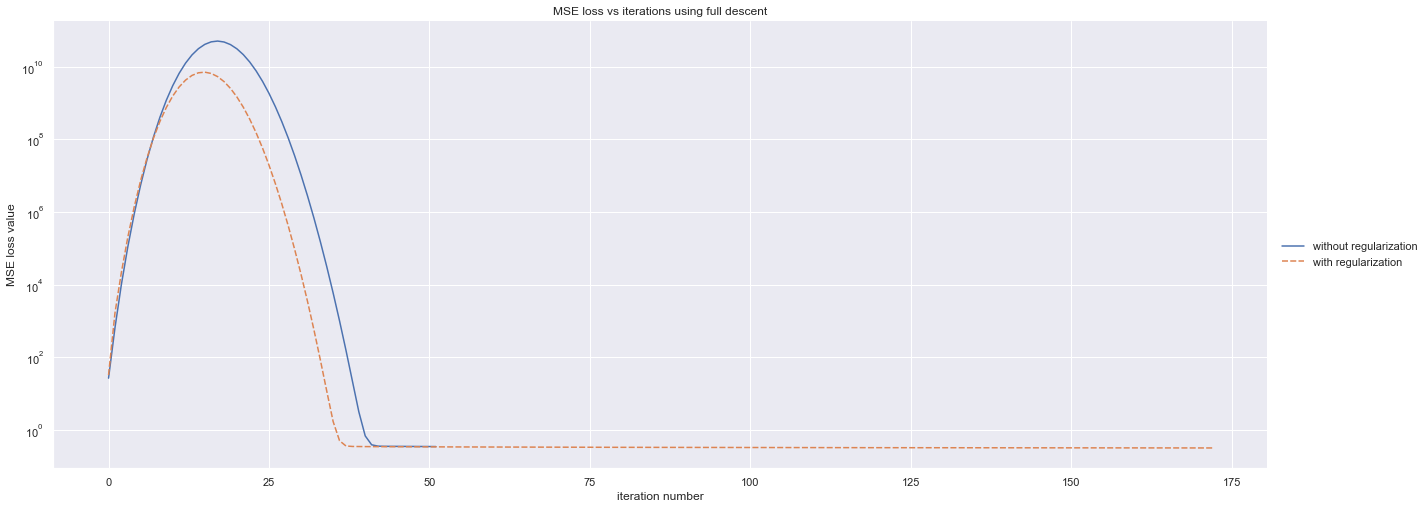

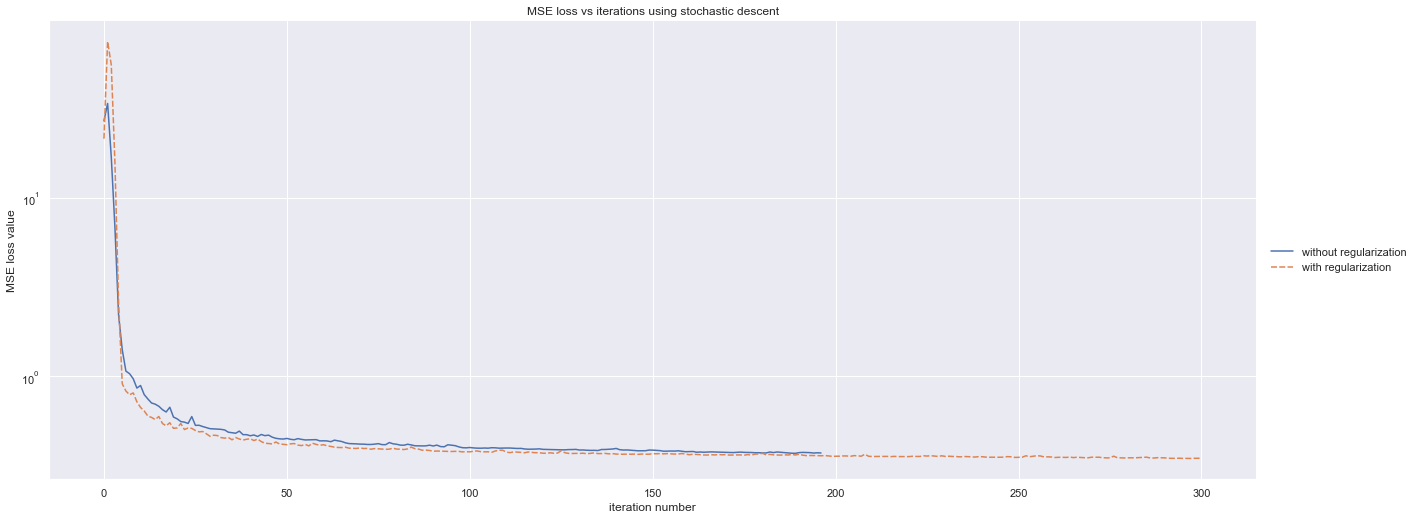

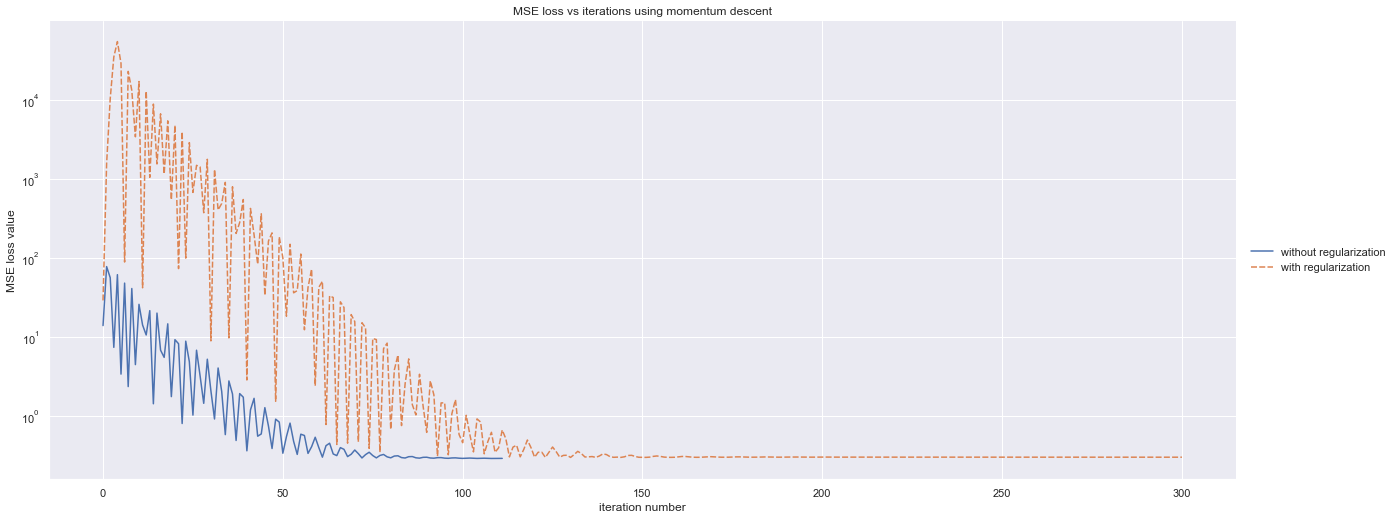

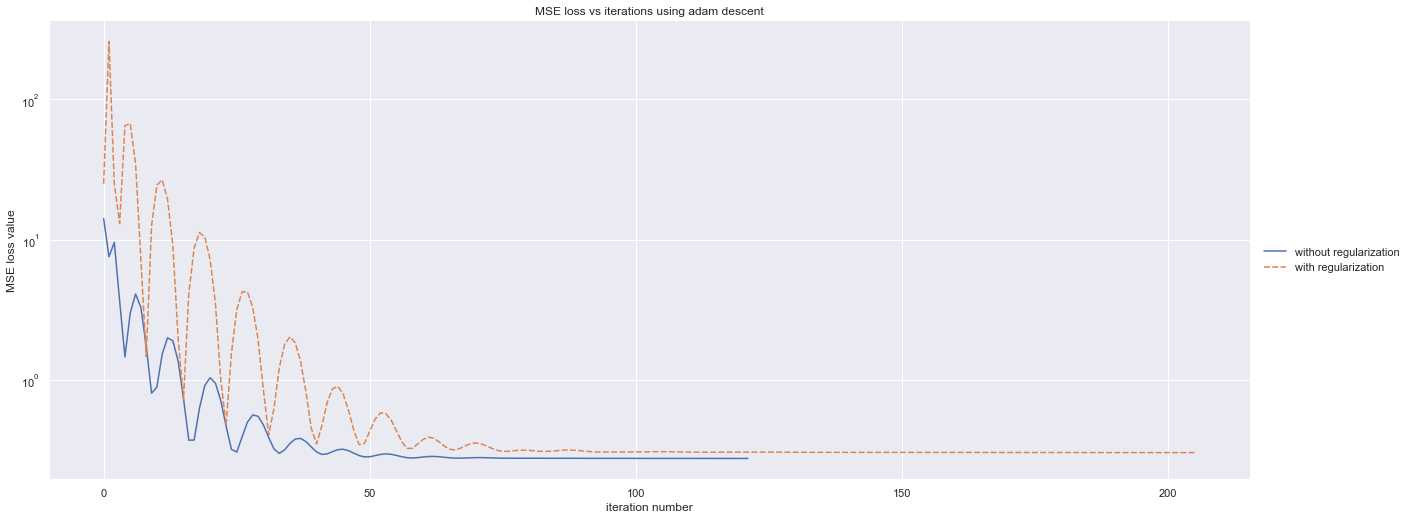

In [ ]:
def fill_with_nans(array: list, size: int) -> list:
    for _ in range(size - len(array)):
        array.append(np.NaN)
    return array

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    size = max(len(iterations[descent_name]), len(reg_iterations[descent_name]))
    iterations[descent_name] = fill_with_nans(iterations[descent_name], size)
    reg_iterations[descent_name] = fill_with_nans(reg_iterations[descent_name], size)

    data = {
        'without regularization': iterations[descent_name],
        'with regularization': reg_iterations[descent_name]
    }

    df = pd.DataFrame.from_dict(data)

    ax = sns.relplot(data=df, kind='line', height=7, aspect=2.5)
    ax.set(yscale="log", xlabel='iteration number', ylabel='MSE loss value', title=f"MSE loss vs iterations using {descent_name} descent")

заметим, что для градиентных спусков без регуляризации требуется меньше итераций для сходимости, да и на обучающей выборке практически все время ошибка меньше, чем при использовании регуляризации. это все еще объясняется переобучением

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
d\Big(L(y, a)\Big) = d\Big(\log (\cosh (a-y))\Big) = \frac{1}{\cosh (a-y)} \cdot d\Big(\cosh (a-y) \Big) = \frac{\sinh (Xw-y)}{\cosh (a-y)} \cdot X = \tanh(a-y)\cdot X
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
from descents import LossFunction


descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'loss_function': LossFunction.LogCosh,
        'dimension': x_train.shape[1],
        'lambda_': 0
    }
}

logcosh_iterations = dict()
logcosh_best_lambdas = dict()
logcosh_train_losses = dict()
logcosh_test_losses = dict()


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name

    lambdas = np.logspace(-2, 2, 20)
    min_loss = 1000000000
    best_lambda = 0
    train_loss = 0
    test_loss = 0

    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(x_train, y_train)
        loss = regression.calc_loss(x_validation, y_validation)
        if loss < min_loss:
            min_loss = loss
            logcosh_best_lambdas[descent_name] = lambda_
            logcosh_train_losses[descent_name] = regression.calc_loss(x_train, y_train)
            logcosh_test_losses[descent_name] = regression.calc_loss(x_test, y_test)
            logcosh_iterations[descent_name] = regression.loss_history

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('--------------------', descent_name, '--------------------')
    print(f"best lambda: {logcosh_best_lambdas[descent_name]}")
    print(f"train loss: {logcosh_train_losses[descent_name]}")
    print(f"test loss: {logcosh_test_losses[descent_name]}")
    print(f"number of iterations: {len(logcosh_iterations[descent_name]) - 1}")

-------------------- full --------------------
best alpha: 8.858667904100823
train loss: 0.32812967045395935
test loss: 0.43300600312487636
number of iterations: 194
-------------------- stochastic --------------------
best alpha: 5.455594781168514
train loss: 0.317796652922558
test loss: 0.42834873379007105
number of iterations: 300
-------------------- momentum --------------------
best alpha: 5.455594781168514
train loss: 0.29060694952509525
test loss: 0.3946550515582547
number of iterations: 149
-------------------- adam --------------------
best alpha: 3.359818286283781
train loss: 0.2834404335220065
test loss: 0.5343712624889411
number of iterations: 128


In [ ]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('--------------------', descent_name, '--------------------')
    print(f"log-cosh train loss: {logcosh_train_losses[descent_name]}")
    print(f"MSE train loss: {train_losses[descent_name]}")
    print(f"log-cosh test loss: {logcosh_test_losses[descent_name]}")
    print(f"MSE test loss: {logcosh_test_losses[descent_name]}")

-------------------- full --------------------
log-cosh train loss: 0.32812967045395935
MSE train loss: 0.34449445041130694
log-cosh test loss: 0.43300600312487636
MSE test loss: 0.43300600312487636
-------------------- stochastic --------------------
log-cosh train loss: 0.317796652922558
MSE train loss: 0.3723178622212747
log-cosh test loss: 0.42834873379007105
MSE test loss: 0.42834873379007105
-------------------- momentum --------------------
log-cosh train loss: 0.29060694952509525
MSE train loss: 0.28694965137498274
log-cosh test loss: 0.3946550515582547
MSE test loss: 0.3946550515582547
-------------------- adam --------------------
log-cosh train loss: 0.2834404335220065
MSE train loss: 0.27400389437787
log-cosh test loss: 0.5343712624889411
MSE test loss: 0.5343712624889411


### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

мы собирались на милкшейк пати!! каждый приходил со своим рецептом милкшейка и делал его

вот фоточка с мероприятия: https://drive.google.com/file/d/1huwthjoBYhZBcfTkWW968D9XdevABqe0/view?usp=sharing

мы че-то забыли сфоткать сами милкшейки, либо я просто не могу найти эту фотографию, но если посмотреть хорошо, то на столе видно стопки с милкшейками

я лично делала полезный милкшейк (скорее смузи), рецепт очень прост: кокосовое молоко и манго, было очень вкусно!!

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# выбрала реализовать AMSGrad

descent_config = {
    'descent_name': 'amsgrad',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 0
    }
}

amsgrad_best_lambda = 0
amsgrad_train_loss = 0
amsgrad_test_loss = 0

lambdas = np.logspace(-2, 2, 20)
min_loss = 1000000000
best_lambda = 0
train_loss = 0
test_loss = 0

for lambda_ in lambdas:
    descent_config['kwargs']['lambda_'] = lambda_

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(x_train, y_train)
    loss = regression.calc_loss(x_validation, y_validation)
    if loss < min_loss:
        min_loss = loss
        amsgrad_best_lambda = lambda_
        amsgrad_train_loss = regression.calc_loss(x_train, y_train)
        amsgrad_test_loss = regression.calc_loss(x_test, y_test)

In [ ]:

print(f"best lambda for AMSGrad: {amsgrad_best_lambda}\n")
print(f"train loss for AMSGrad: {amsgrad_train_loss}")
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f"train loss for {descent_name}: {train_losses[descent_name]}")
print(f"\ntest loss for AMSGrad: {amsgrad_test_loss}")
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f"test loss for {descent_name}: {test_losses[descent_name]}")

best lambda for AMSGrad: 0.29763514416313175

train loss for AMSGrad: 0.2743797155995983
train loss for full: 0.34449445041130694
train loss for stochastic: 0.3723178622212747
train loss for momentum: 0.28694965137498274
train loss for adam: 0.27400389437787

test loss for AMSGrad: 0.5186235593562621
test loss for full: 0.43883784563939754
test loss for stochastic: 0.4786666842439982
test loss for momentum: 0.39032691401199027
test loss for adam: 0.5151506546709551


### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

**MAE**:
$$
    L(y, a)
    =
    |a - y|\\
d(L(y, a)) = d(|a-y|) =

\begin{cases}
d(a - y), & a - y > 0 \\
d(y - a), & a - y < 0
\end{cases} = [a = xw] = \begin{cases}
x, & a - y > 0 \\
-x, & a - y < 0
\end{cases} = \text{sign}(xw-y) \cdot x
$$

это для одного элемента, так что в общем случае
$$
\nabla_w Q(w) = \frac 1\ell \sum_{i=0}^{\ell} \nabla_w L(y, wx_i) = \frac1 \ell \sum \text{sign}(xw-y) \cdot x = \frac1 \ell X^T \text{sign}(Xw-y)
$$

**Huber**:
$$
    L(y, a)
    =
    \begin{cases}
    \frac 12(y - a)^2 , & |y-a|\le \delta \\
    \delta \left(|y-a| - \frac\delta 2\right), & |y-a|> \delta
    \end{cases}\\
$$

рассмотрим отдельно два случая:

1. $|y-a|\le \delta$
$$
d\left(\frac 12 (y-a)^2\right) = (y-a)\cdot d(y-a) = [a = xw] = (-x)\cdot(y-a)
$$

2. $|y-a|> \delta$
$$
d\left(\delta \left(|y-a| - \frac\delta 2\right)\right) = d(|y-a|) = \begin{cases}
x, & y - a > 0 \\
-x, & y - a < 0
\end{cases}
$$

в итоге получаем
$$
\nabla Q(w) = \frac 1\ell
\hat X^T(y-\hat Xw) +
\tilde X^T \text{sign}(y-\tilde Xw)
$$
где $\hat X$ – это матрица, состоящая из строчек исходной, при перемножении оказывающиеся меньше дельты, $\tilde X$ – больше дельты

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
from descents import LossFunction

loss_functions = [LossFunction.MAE, LossFunction.Huber]
descents = ['full', 'stochastic', 'momentum', 'adam']

new_losses_iterations = list()
new_losses_best_lambdas = list()
new_losses_train_losses = list()
new_losses_test_losses = list()

for i in range(2):
    descent_config = {
        'descent_name': 'some name that we will replace in the future',
        'kwargs': {
            'loss_function': loss_functions[i],
            'dimension': x_train.shape[1],
            'lambda_': 0
        }
    }

    new_losses_iterations.append(dict())
    new_losses_best_lambdas.append(dict())
    new_losses_train_losses.append(dict())
    new_losses_test_losses.append(dict())


    for descent_name in descents:
        descent_config['descent_name'] = descent_name

        lambdas = np.logspace(-2, 2, 20)
        min_loss = 1000000000
        best_lambda = 0
        train_loss = 0
        test_loss = 0

        for lambda_ in lambdas:
            descent_config['kwargs']['lambda_'] = lambda_

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(x_train, y_train)
            loss = regression.calc_loss(x_validation, y_validation)
            if loss < min_loss:
                min_loss = loss
                new_losses_best_lambdas[i][descent_name] = lambda_
                new_losses_train_losses[i][descent_name] = regression.calc_loss(x_train, y_train)
                new_losses_test_losses[i][descent_name] = regression.calc_loss(x_test, y_test)
                new_losses_iterations[i][descent_name] = regression.loss_history

    if i == 0:
        print("MAE LOSS FUNCTION")
    else:
        print("\nHUBER LOSS FUNCTION")
    for descent_name in descents:
        print('--------------------', descent_name, '--------------------')
        print(f"best lambda: {new_losses_best_lambdas[i][descent_name]}")
        print(f"train loss: {new_losses_train_losses[i][descent_name]}")
        print(f"test loss: {new_losses_test_losses[i][descent_name]}")
        print(f"number of iterations: {len(new_losses_iterations[i][descent_name]) - 1}")

/Users/neudachina/Desktop/ML/3-gd/descents.py:192: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + self.lr() * gradient


MAE LOSS FUNCTION
-------------------- full --------------------
best lambda: 2.06913808111479
train loss: 0.37393654997388176
test loss: 0.47249615387494065
number of iterations: 74
-------------------- stochastic --------------------
best lambda: 0.4832930238571752
train loss: 0.3586634700731787
test loss: 0.4532045215309992
number of iterations: 223
-------------------- momentum --------------------
best lambda: 0.7847599703514611
train loss: 0.28900063572413814
test loss: 0.3888377322371356
number of iterations: 111
-------------------- adam --------------------
best lambda: 8.858667904100823
train loss: 0.2748850363692418
test loss: 0.5097776731432396
number of iterations: 128

HUBER LOSS FUNCTION
-------------------- full --------------------
best lambda: 8.858667904100823
train loss: 0.3242533075740692
test loss: 0.4248554330697474
number of iterations: 238
-------------------- stochastic --------------------
best lambda: 0.4832930238571752
train loss: 0.3515834725600636
test lo

In [ ]:

losses_list = [LossFunction.MSE, LossFunction.MAE, LossFunction.LogCosh, LossFunction.Huber]
losses_to_name = {LossFunction.MSE: 'MSE',
                  LossFunction.MAE: 'MAE',
                  LossFunction.LogCosh: 'Log-Cosh',
                  LossFunction.Huber: 'Huber'}

different_train_losses = {
    LossFunction.MSE: train_losses,
    LossFunction.LogCosh: logcosh_train_losses,
    LossFunction.MAE: new_losses_train_losses[0],
    LossFunction.Huber: new_losses_train_losses[1]
}

different_test_losses = {
    LossFunction.MSE: test_losses,
    LossFunction.LogCosh: logcosh_test_losses,
    LossFunction.MAE: new_losses_test_losses[0],
    LossFunction.Huber: new_losses_test_losses[1]
}

for descent_name in descents:
    print('--------------------', descent_name, '--------------------')
    for loss in losses_list:
        print(f"train loss using {losses_to_name[loss]}: {different_train_losses[loss]}")
    print('')
    for loss in losses_list:
        print(f"test loss using {losses_to_name[loss]}: {different_test_losses[loss]}")

-------------------- full --------------------
train loss using MSE: {'full': 0.34449445041130694, 'stochastic': 0.3723178622212747, 'momentum': 0.28694965137498274, 'adam': 0.27400389437787}
train loss using MAE: {'full': 0.3552797469475148, 'stochastic': 0.3666540665662333, 'momentum': 0.286693919709371, 'adam': 0.2779843044305078}
train loss using Log-Cosh: {'full': 0.32812967045395935, 'stochastic': 0.317796652922558, 'momentum': 0.29060694952509525, 'adam': 0.2834404335220065}
train loss using Huber: {'full': 0.32508135284256523, 'stochastic': 0.35723079405934577, 'momentum': 0.28775493564520055, 'adam': 0.29717385552421854}

test loss using MSE: {'full': 0.43883784563939754, 'stochastic': 0.4786666842439982, 'momentum': 0.39032691401199027, 'adam': 0.5151506546709551}
test loss using MAE: {'full': 0.4630575014401259, 'stochastic': 0.4677243558990355, 'momentum': 0.39503474451473874, 'adam': 0.48859799995499575}
test loss using Log-Cosh: {'full': 0.43300600312487636, 'stochastic':

можно заметить, что для каждого вида градиентного спуска есть какой-то свой вид ошибки, минимальный для этого вида спуска. например, для полного лучше всего как будто бы работает Huber-Loss, а для ADAM - MAE. думаю, это связано с тем, что каждый вид градиентного спуска и способ подсчета ошибки подходит для тех или иных случаев данных